# Data Preprocessing

In [1]:
import pandas as pd
import PIL
from glob import glob
import os
import matplotlib.pyplot as plt
import re

In [2]:

def load_data(typ):

    """Load image data and join with annotation information."""

    df_annotation = pd.read_csv(f"data/{typ}/_annotations.csv")
    df_img = pd.DataFrame()

    base_dir = rf'data/{typ}/*.jpg'
    files = glob(base_dir)

    imgs = []
    for i in files:
        imgs.append(plt.imread(i))

    files = [re.sub(f'data/{typ}/', '', i) for i in files]

    df_img['filename'] = files
    df_img['image'] = imgs
    df_train = pd.merge(df_annotation, df_img, on='filename')
    return df_train


In [3]:
df_train = load_data('train')

In [4]:
df_valid = load_data('valid')

In [5]:
df_test = load_data('test')

In [6]:
print(df_train.info())
print(df_valid.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48489 entries, 0 to 48488
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  48489 non-null  object
 1   width     48489 non-null  int64 
 2   height    48489 non-null  int64 
 3   class     48489 non-null  object
 4   xmin      48489 non-null  int64 
 5   ymin      48489 non-null  int64 
 6   xmax      48489 non-null  int64 
 7   ymax      48489 non-null  int64 
 8   image     48489 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14501 entries, 0 to 14500
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  14501 non-null  object
 1   width     14501 non-null  int64 
 2   height    14501 non-null  int64 
 3   class     14501 non-null  object
 4   xmin      14501 non-null  int64 
 5   ymin      14501 non-null  int64 
 6   xm

In [7]:
df_train[['xmin', 'ymin', 'xmax', 'ymax']].agg(['max', 'min'])

,xmin,ymin,xmax,ymax
max,6097,6447,6994,7915
min,0,0,24,39


In [8]:
sample_img = df_train.iloc[400,:]
sample_img

filename    IMG_20220809_234628_jpg.rf.02d5e06f97721a13b39...
width                                                    1440
height                                                   1080
class                                              white-pawn
xmin                                                      838
ymin                                                      233
xmax                                                      921
ymax                                                      308
image       [[[56, 63, 89], [58, 65, 91], [57, 64, 90], [5...
Name: 400, dtype: object

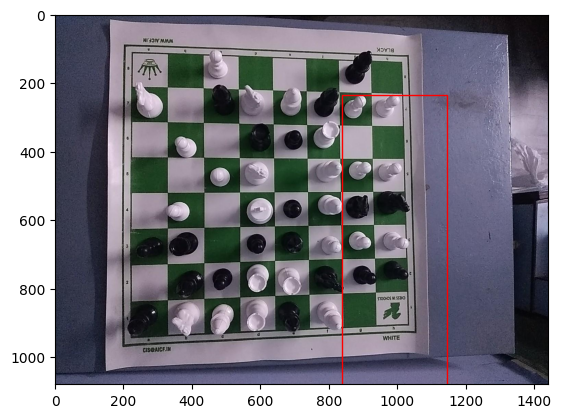

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
plt.rcParams["figure.autolayout"] = True
ax.imshow(sample_img['image'])
rect = patches.Rectangle((sample_img['xmin'], sample_img['ymin']), 
                         sample_img['ymax'], sample_img['xmax'],
                         edgecolor='red',
                         facecolor='none',
                         linewidth=1)

ax.add_patch(rect)